### Exploring the data tips in seaborn

### 1. Market Fact Analysis

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading a csv file

In [2]:
 df = pd.read_csv('market_fact.csv')
print(df.head(5))
df.describe()

     Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
0  Ord_5446  Prod_16  SHP_7609  Cust_1818   136.81      0.01              23   
1  Ord_5406  Prod_13  SHP_7549  Cust_1818    42.27      0.01              13   
2  Ord_5446   Prod_4  SHP_7610  Cust_1818  4701.69      0.00              26   
3  Ord_5456   Prod_6  SHP_7625  Cust_1818  2337.89      0.09              43   
4  Ord_5485  Prod_17  SHP_7664  Cust_1818  4233.15      0.08              35   

    Profit  Shipping_Cost  Product_Base_Margin  
0   -30.51           3.60                 0.56  
1     4.56           0.93                 0.54  
2  1148.90           2.50                 0.59  
3   729.34          14.30                 0.37  
4  1219.87          26.30                 0.38  


,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [3]:
df2 = df.groupby(['Cust_id']).size()
print(df2.head(5))

Cust_id
Cust_1        1
Cust_10       1
Cust_100      6
Cust_1000     7
Cust_1001    10
dtype: int64


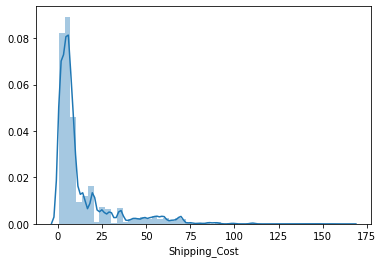

In [4]:
sns.distplot(df.Shipping_Cost)
plt.show()

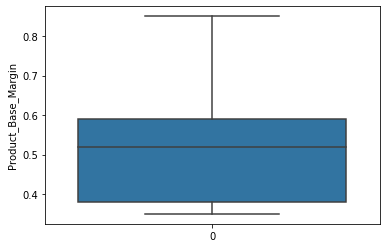

In [5]:
sns.boxplot(data=df["Product_Base_Margin"])
plt.ylabel("Product_Base_Margin");

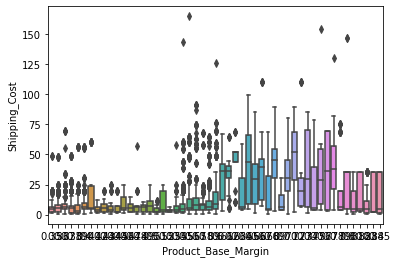

In [6]:
sns.boxplot( x=df["Product_Base_Margin"],y=df["Shipping_Cost"]) # add boxplot to 1st subplot

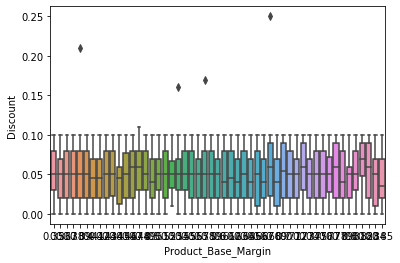

In [7]:
sns.boxplot(x=df["Product_Base_Margin"],y=df["Discount"] )

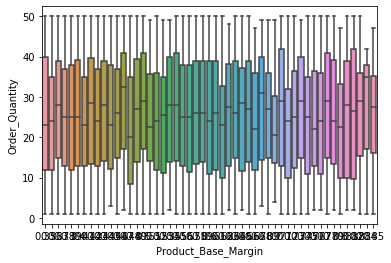

In [8]:
sns.boxplot(y=df["Order_Quantity"],x=df["Product_Base_Margin"] )

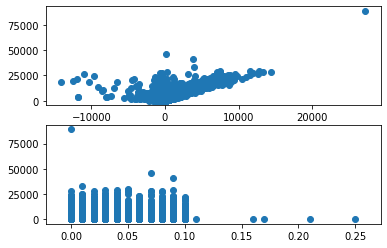

In [9]:
plt.subplot(2,1,1)
plt.scatter(df["Profit"],df["Sales"])
plt.subplot(2,1,2)
plt.scatter(df["Discount"],df["Sales"])

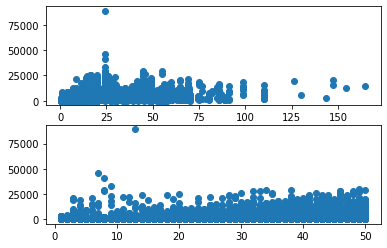

In [10]:
plt.subplot(2,1,1)
plt.scatter(df["Shipping_Cost"],df["Sales"])
plt.subplot(2,1,2)
plt.scatter(df["Order_Quantity"],df["Sales"])

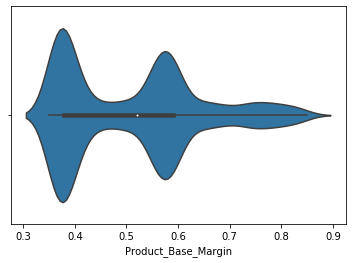

In [11]:
sns.violinplot(x=df["Product_Base_Margin"])

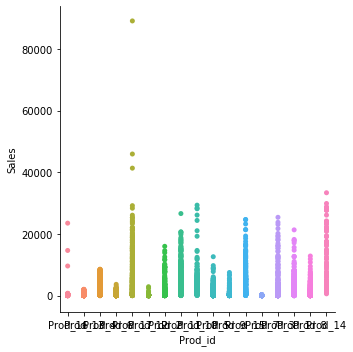

In [12]:
sns.catplot(x="Prod_id", y="Sales",jitter = False,  data=df)

### Titanic Survivors

#### Importing necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import csv

#### Loading the dataset

In [14]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic.info()  # The dataset has 891 enteries with 11 features and a target variable 'survived'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
titanic.columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Setting PassengerId as the index for the dataset

In [17]:
titanic.set_index('PassengerId', drop=True, append=False, inplace=False, verify_integrity=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### Create a pie chart presenting the male/female proportion

In [18]:
unique_count=titanic.nunique()
gender_count = titanic['Sex'].value_counts()
#female_count = titanic['Sex'].str.match('female').count()
#male_count = titanic['Sex'].str.match("male").count()
print(gender_count)
#print(female_count)
#print(male_count)

male      577
female    314
Name: Sex, dtype: int64


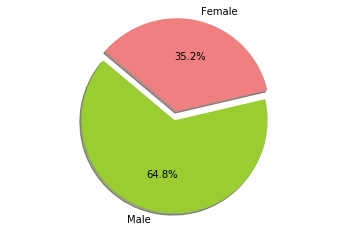

In [19]:
# Attributes for the pie chart
labels = 'Male', 'Female'
sizes = [577,314]
colors = ['yellowgreen','lightcoral'] #,color for the portions
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Histogram showing the male/female survival 

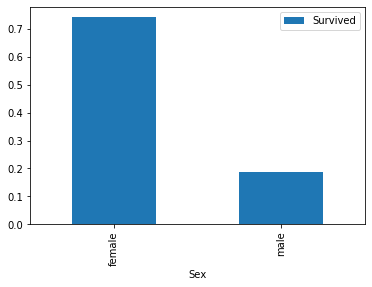

In [35]:
sex_pivot = titanic.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()